# Informações Iniciais

Email do professor: rui.maia@tecnico.ulisboa.pt

Max(0,4 * projeto+0,1 * entregas_dos_labs, 0,4 * projeto)
Entregas do dataset 1 na semana posterior a aula

Para apresentar, precisa fazer as coisas que fazem sentido (no caso dessa semana, sera apresentado os graficos que julgarmos interessantes)

# Answers for the Lab01 questions

Imports from libraries and dataset

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

plt.figure(num=1, figsize=(5,4))
register_matplotlib_converters()

algae = pd.read_csv('datasets/algae.csv', index_col='date', parse_dates=True, infer_datetime_format=True)
algae.head()

,pH,Oxygen,Chloride,Nitrates,Ammonium,Orthophosphate,Phosphate,Chlorophyll,fluid_velocity,river_depth,season
date,,,,,,,,,,,
2018-09-30,8.10,11.4,40.02,5.33,346.67,125.67,187.06,15.6,medium,low,autumn
2018-10-05,8.06,9.0,55.35,10.42,233.70,58.22,97.58,10.5,medium,low,autumn
2018-10-07,8.05,10.6,59.07,4.99,205.67,44.67,77.43,6.9,high,low,autumn
2018-10-09,7.55,11.5,4.70,1.32,14.75,4.25,98.25,1.1,high,low,autumn
2018-10-11,7.75,10.3,32.92,2.94,42.00,16.00,40.00,7.6,high,low,autumn


<Figure size 360x288 with 0 Axes>

Considering the algae dataset:

    1.How many instances?

In [4]:
algae.shape[0]

200

    2.How many attributes? And for each type?

In [7]:
print(algae.shape[1])
algae.dtypes

11


pH                float64
Oxygen            float64
Chloride          float64
Nitrates          float64
Ammonium          float64
Orthophosphate    float64
Phosphate         float64
Chlorophyll       float64
fluid_velocity     object
river_depth        object
season             object
dtype: object

    3.Explore the variable season.
        A.What is its type?
        B.What is its domain?

In [38]:
print(algae['season'].dtype)
print(algae['season'].describe())
algae.head()

category
count        200
unique         4
top       winter
freq          62
Name: season, dtype: object


,pH,Oxygen,Chloride,Nitrates,Ammonium,Orthophosphate,Phosphate,Chlorophyll,fluid_velocity,river_depth,season
date,,,,,,,,,,,
2018-09-30,8.10,11.4,40.02,5.33,346.67,125.67,187.06,15.6,medium,low,autumn
2018-10-05,8.06,9.0,55.35,10.42,233.70,58.22,97.58,10.5,medium,low,autumn
2018-10-07,8.05,10.6,59.07,4.99,205.67,44.67,77.43,6.9,high,low,autumn
2018-10-09,7.55,11.5,4.70,1.32,14.75,4.25,98.25,1.1,high,low,autumn
2018-10-11,7.75,10.3,32.92,2.94,42.00,16.00,40.00,7.6,high,low,autumn


        C.At what granularity? Is it enough?

In [29]:
algae['season'].unique()

[autumn, winter, spring, summer]
Categories (4, object): [autumn, winter, spring, summer]

It's divided in the 4 seasons of the year, I'd say that it can be enough if the conditions for each season doens't vary a lot in the 3 months period.

        D.Explore its distribution.

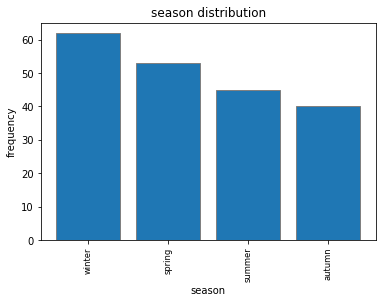

In [30]:
def bar_chart(ax: plt.Axes, xvalues: list, yvalues: list, title: str, xlabel: str, ylabel: str, percentage=False):
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(xvalues, rotation=90, fontsize='small')
    if percentage:
        ax.set_ylim(0.0, 1.0)
    ax.bar(xvalues, yvalues, edgecolor='grey')

algae['season'] = algae['season'].astype('category')    

plt.figure()    
counts = algae['season'].value_counts()
bar_chart(plt.gca(), counts.index, counts.values, 'season distribution', 'season', 'frequency')
plt.show()

    4.Explore the pH variable.
        A.What is its type?
        B.What is its domain and range?

In [35]:
print(algae['pH'].dtype)
algae['pH'].describe()

float64


count    199.000000
mean       8.011759
std        0.598302
min        5.600000
25%        7.700000
50%        8.060000
75%        8.400000
max        9.700000
Name: pH, dtype: float64

        C.How many missing values?

In [43]:
print(algae['pH'].isna().sum())

1


        D.How is its distribution?

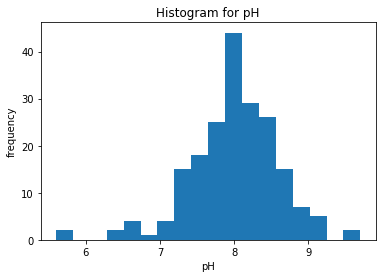

In [50]:
plt.figure()
plt.hist(algae['pH'].dropna().values, 'auto')
plt.gca().set_title('Histogram for pH')
plt.gca().set_xlabel('pH')
plt.gca().set_ylabel('frequency')
plt.show()

        E.What about outliers?

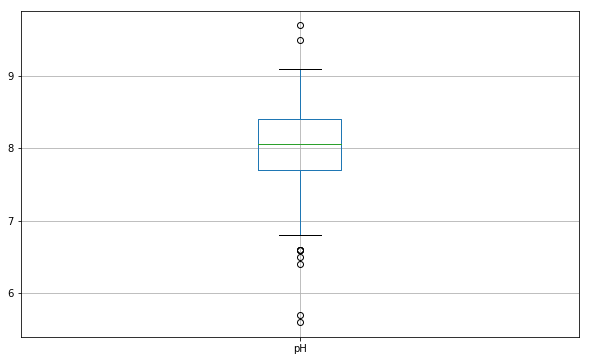

In [65]:
algae.boxplot(figsize=(10,6), column=['pH'])
plt.show()

There aren't many outliers as showed above.